In [1]:
# Imports
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import missingno as msno # Missing values
import numpy as np # arrays
import random # random generators
import string # string functions
from timeit import default_timer as timer # Time how long commands take
import math # math.ceil

import warnings # Control warnings
warnings.filterwarnings('ignore') # Ignore warnings to clean up visual output change back to 'default' to see them

%matplotlib inline
plt.style.use('ggplot')

# Create fake data

In [2]:
row_num = 5000
# Create columns names for dataset
columns = [''.join(random.choices(string.ascii_uppercase + string.digits, k=5)) for x in range(380)]
# Add Thyroid cancer to columns
columns.insert(0, 'userId')
# Add userId to columns
columns.append('thyroid_cancer')

# Create dataframe rows with different possible data types
dictionary = {}

for item in columns:

    column_options = [[random.randint(0,1) for i in range(row_num)], np.random.randint(0, 10, row_num, dtype=int), np.random.randint(0, 3, row_num, dtype=int),
                      np.random.random_sample(size = row_num), np.random.uniform(low=0, high=3000, size=row_num), np.random.uniform(low=0, high=150, size=row_num)]

    dictionary[item] = random.choice(column_options)

# Create the pandas DataFrame
df = pd.DataFrame(dictionary)
# Change userId values
df['userId'] = [x for x in range(row_num)]

# Make userId index
df.set_index('userId', inplace=True)

# Add missing values
for col in df.columns:
    df.loc[df.sample(frac=random.uniform(0, 0.1)).index, col] = np.nan

# Make thyroid cancer data binary with no missing values
df['thyroid_cancer'] = [random.randint(0, 1) for x in range(row_num)]

In [3]:
df.head(10)

,RAKSN,JNSCF,8PMVU,WCN50,VK2IJ,CTE4R,OM59C,HV48U,UAFX1,BVXK6,...,9Z80J,NY00A,1IYKC,GNI6Y,BWAPH,OO5DM,Q20X4,7UM2W,5OVMK,thyroid_cancer
userId,,,,,,,,,,,,,,,,,,,,,
0,1364.403838,1.0,0.092031,1.0,0.254544,0.388079,0.0,0.621550,58.003686,0.012463,...,2.0,7.0,0.382052,9.0,836.702250,2.0,2.0,4.0,519.662360,0
1,563.613408,1.0,0.573174,1.0,0.402334,0.048462,4.0,0.454657,102.971463,0.026581,...,4.0,9.0,0.757857,3.0,1547.348122,2.0,0.0,3.0,1736.122354,1
2,2853.319058,0.0,0.000073,1.0,0.008979,0.432758,3.0,0.658445,23.326824,0.378579,...,3.0,5.0,0.167560,8.0,93.339185,2.0,0.0,7.0,1215.982619,1
3,726.261546,1.0,0.591284,1.0,0.628984,0.877307,5.0,0.232736,148.675866,0.461883,...,2.0,4.0,0.515218,5.0,2238.598350,2.0,2.0,1.0,NaN,1
4,2155.737178,0.0,0.772636,0.0,0.308528,0.586433,2.0,0.667776,51.360752,0.421598,...,5.0,4.0,0.551995,6.0,726.911093,1.0,2.0,5.0,125.992876,0
5,1456.066668,1.0,0.761084,0.0,NaN,0.200625,1.0,0.893029,147.232536,0.572708,...,1.0,7.0,0.980481,9.0,1000.359665,2.0,2.0,2.0,751.441574,0
6,1549.648356,0.0,0.054269,0.0,0.616790,0.624097,5.0,NaN,93.485296,0.933408,...,1.0,6.0,0.534598,2.0,2771.062514,0.0,0.0,7.0,2137.093853,1
7,2535.363168,0.0,0.057042,0.0,0.882113,0.005087,5.0,0.717942,105.030572,0.272150,...,8.0,6.0,0.947486,4.0,46.932498,1.0,2.0,3.0,2968.220769,0
8,1741.457380,1.0,0.384809,1.0,0.254435,NaN,7.0,0.079966,17.826445,0.822325,...,NaN,7.0,0.272103,4.0,2773.034301,2.0,0.0,3.0,683.586377,1


# Manual Preprocessing - UK Biobank ThyCa specific

In [4]:
# Make sure thyroid cancer column has been added

In [5]:
# Make sure diseases descriptions are the column names rather than just phecodes

In [6]:
# Manual feature selection - use mutual information and consider data leakage.

# Data Exploration

### Missing Values
Useful [guide](https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea).

<AxesSubplot:>

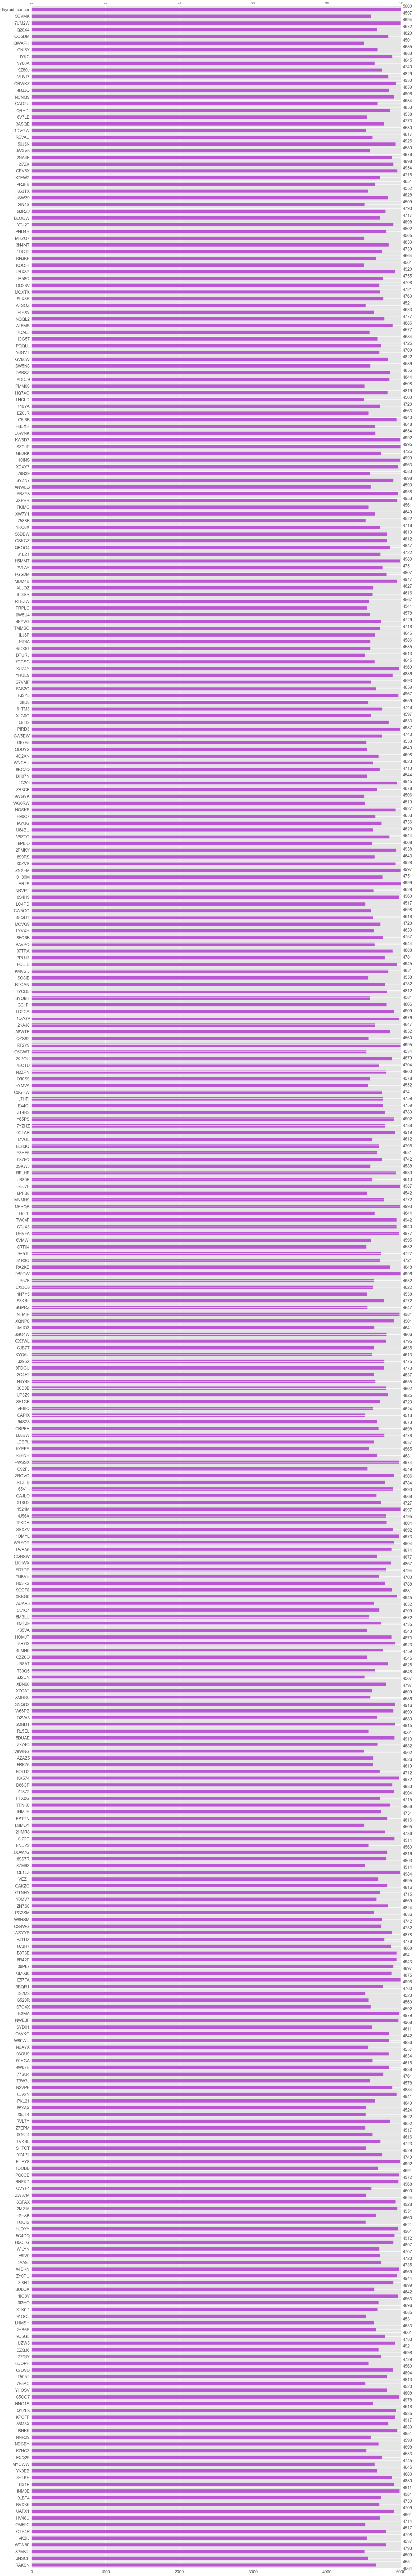

In [7]:
# Bar chart of missing values
msno.bar(df, color='#BA55D3')

<AxesSubplot:>

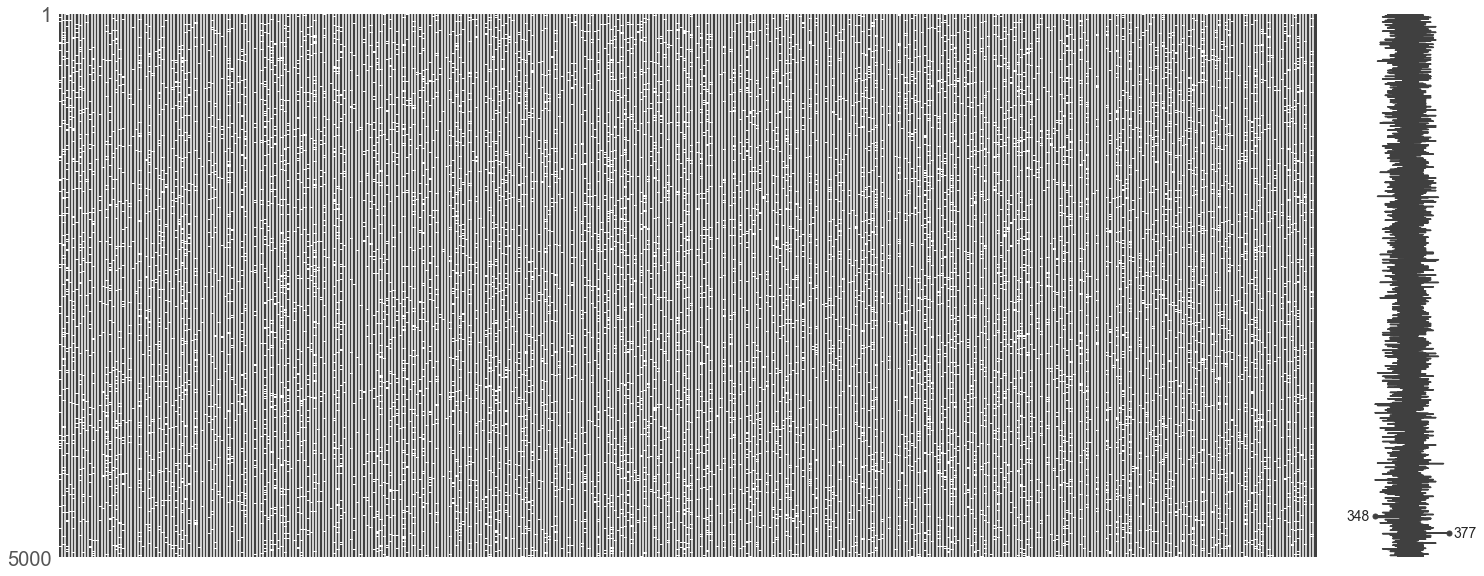

In [8]:
# Matrix plot giving positional information about missing values
msno.matrix(df)

<AxesSubplot:>

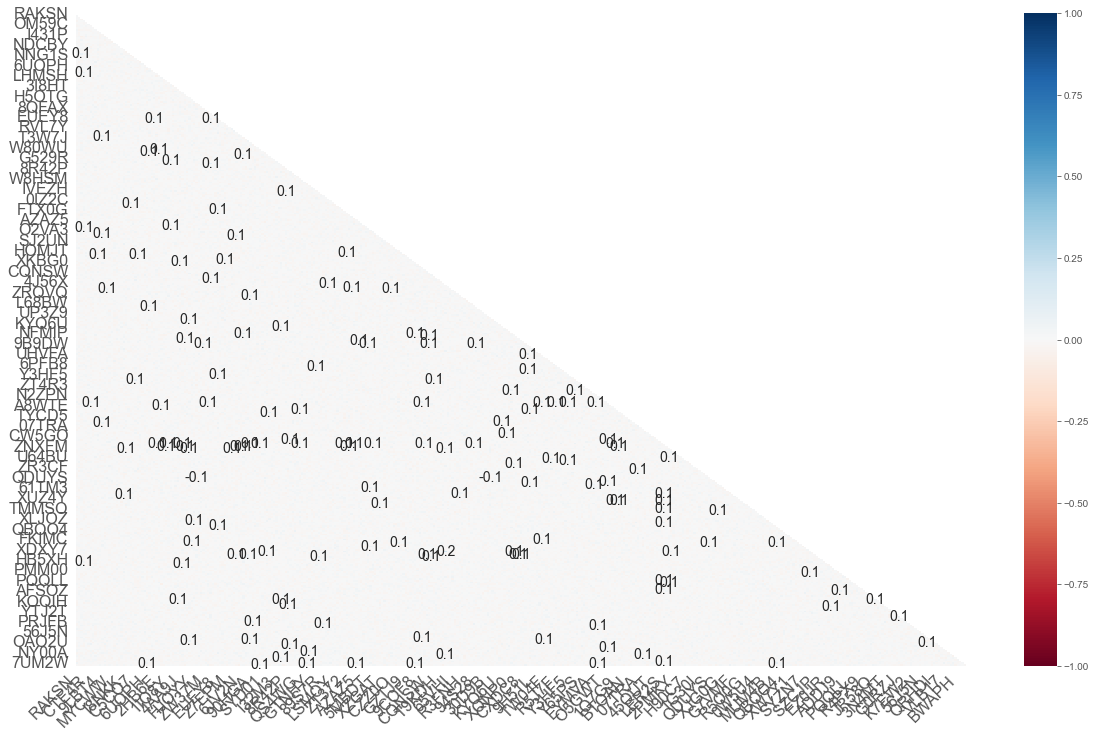

In [9]:
# Plot heatmap of missing features
msno.heatmap(df)

### Target-class Imbalance

In [10]:
# Create a dataframe showing thyroid cancer vs no thyroid cancer to plot from
c_imbal = pd.DataFrame([[len(df.loc[df['thyroid_cancer'] == 1]), 'Thyroid_Cancer'], [len(df.loc[df['thyroid_cancer'] != 1]), 'No_Thyroid_Cancer']], columns=['Participant_Count', 'Disease_State'])

In [11]:
c_imbal # Show dataframe

,Participant_Count,Disease_State
0,2465,Thyroid_Cancer
1,2535,No_Thyroid_Cancer


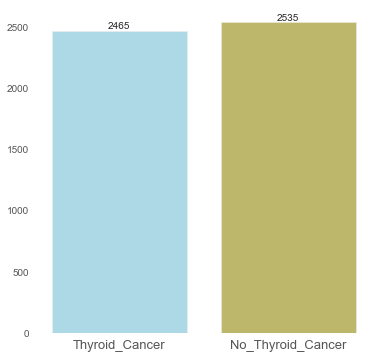

In [12]:
# Plot bar chart of imbalance
colours = ['lightblue', 'darkkhaki'] # Colour names
plt.figure(figsize=(6,6)) # Figure size
plt.rcParams['axes.facecolor'] = 'white' # Barchart background colour
plt.grid() # Remove grid background

bars = plt.bar(c_imbal['Disease_State'], c_imbal['Participant_Count'], color=colours) # Create the bars
plt.bar_label(bars) # Add number label on top of bars
plt.xticks(fontsize=13) # Fontsize of x-axis bar labels
plt.show() # Show figure
#plt.savefig('Figures/Class_imbalance_bar.png', bbox_inches='tight') # Save figure

### Summary Statistics (including boxplots) for Continuous Variables (Features)

In [13]:
# Function to get column names for continuous and non-continuous (categorical) features
def find_cat_or_con_columns(dataframe):

    columns = [list(dataframe[i]) for i in dataframe] # Nested list of column values

    uniques = [len(set([i for i in a if pd.notna(i)])) for a in columns] # Num of unique values in a column

    continuous_indexes = [i for i, c in enumerate(uniques) if c > 10] # Indexes of continuous columns

    categorical_indexes = [i for i, c in enumerate(uniques) if c <= 10] # Indexes of categorical columns

    con_cols = [dataframe.columns[x] for x in continuous_indexes] # List containing continuous columns names

    cat_cols = [dataframe.columns[x] for x in categorical_indexes] # List containing categorical columns names

    return con_cols, cat_cols # return two lists of continuous & categorical column names

In [14]:
# Find continuous columns
continuous_cols, categorical_cols = find_cat_or_con_columns(df)

# Summary statistics for continuous (transpose for presentation)
df[continuous_cols].groupby(df['thyroid_cancer']).describe().T.head(15)

thyroid_cancer            0            1
RAKSN count     2385.000000  2279.000000
      mean      1517.186624  1492.052478
      std        875.292956   870.119093
      min          1.442364     0.300945
      25%        732.158635   738.484663
      50%       1556.536475  1515.161416
      75%       2267.524207  2243.959206
      max       2999.367848  2998.351102
8PMVU count     2274.000000  2235.000000
      mean         0.513371     0.491986
      std          0.288806     0.283370
      min          0.000556     0.000073
      25%          0.275259     0.250221
      50%          0.515750     0.488454
      75%          0.767312     0.729366

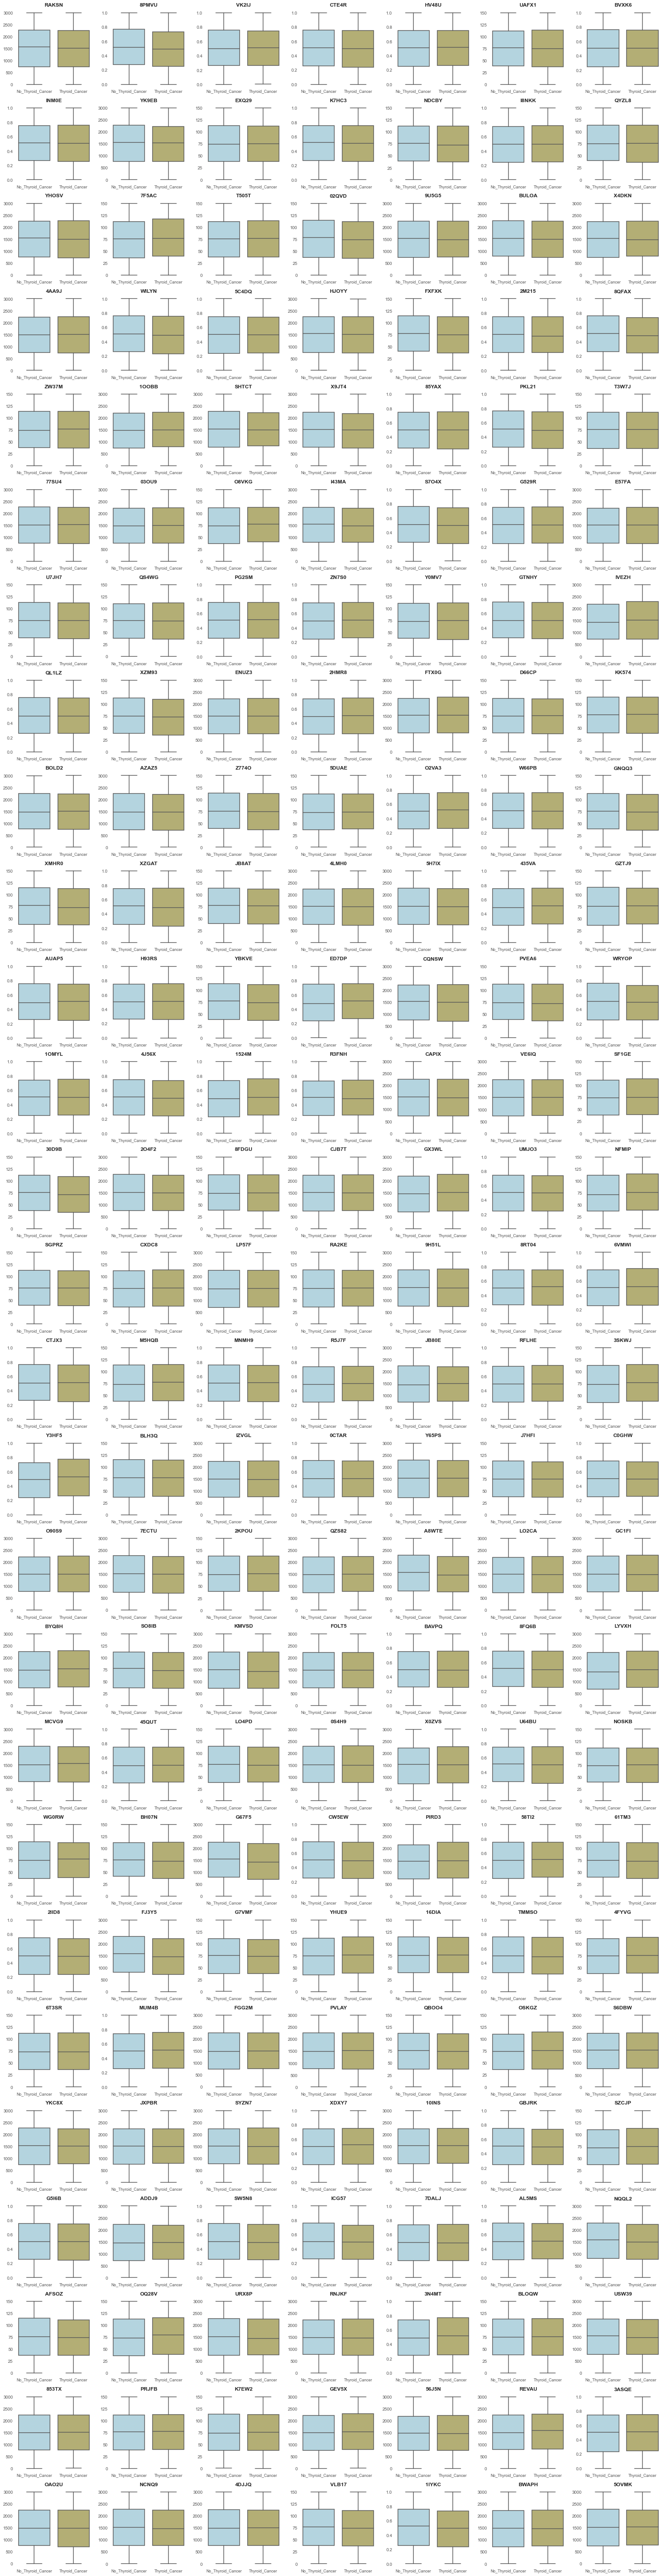

In [15]:
### Boxplots ###
customPalette = sns.set_palette(sns.color_palette(colours))

fig_col_num = 7
fig_row_num = math.ceil(len(continuous_cols)/fig_col_num)
fig_height = fig_row_num*3
fig_width = fig_col_num*3

fig, axes = plt.subplots(fig_row_num, fig_col_num, figsize=(fig_width,fig_height))
axes = axes.flatten()
plt.rcParams['axes.facecolor'] = 'white'


for i, col in enumerate(df[continuous_cols]):
    sns.boxplot(x=df['thyroid_cancer'], y=col, data=df, palette=customPalette, ax = axes[i])
    axes[i].set(xlabel=None, ylabel=None)
    axes[i].tick_params(axis=u'both', which=u'both',length=0)
    axes[i].set_title('%s' %(col), fontweight='bold', fontsize=12)
    axes[i].set_xticklabels(['No_Thyroid_Cancer', 'Thyroid_Cancer'], size=9)

plt.tight_layout()
plt.grid()
plt.show()
#plt.savefig('Figures/continuous_boxplots.png', bbox_inches='tight') # Save figure

### Correlation Matrices

In [35]:
# Create a correlation matrix to determine if some features should be removed
correlation_matrix = df.corr()

# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()

# Sort correlation pairs
sorted_mat = round(unique_corr_pairs, 3).sort_values(ascending=False, key=abs) # this only gives absolute values

# Print descending correlation values
print(sorted_mat.head(10))


RT2Y9  02QVD    0.065
1DC12  C0GHW   -0.062
DSBSZ  IZVGL    0.061
0375Q  XZM93    0.057
G67F5  KK574   -0.057
H93RS  C5CO7    0.057
2KAJ8  MYCWW    0.056
U7JH7  T505T   -0.056
LO4PD  MCVG9   -0.056
SZCJP  WG0RW    0.056
dtype: float64


### Pairplots of Quantitative Variables

### Further Inspection of Correlated Variables

---
Manual curation of features before moving on to the ML pipeline/workflow.

# Test Train Split

Simple concept of splitting the data into two parts, one part for training the model and the other for testing the success of the model. Read more about the details [here](https://towardsdatascience.com/understanding-train-test-split-scikit-learn-python-ea676d5e3d1) and the sklearn documentation for it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [231]:
# Look at our data
df

,QI8KX,EW5XJ,394MJ,5JCY6,N2TG9,MWSMR,M57ER,U0DHH,RWCWO,MAR0D,...,W18UI,ANLUA,66BMD,DKW6X,UB65D,G1106,Z55FK,5LZSG,0XI7C,thyroid_cancer
userId,,,,,,,,,,,,,,,,,,,,,
0,2.0,178.411894,64.271156,7.0,7.0,0.342611,79.245015,0.0,1.0,1.0,...,6.0,4.0,2645.203075,54.583515,2764.888478,0.0,138.187447,1.0,2285.403528,0
1,2.0,41.058191,67.988225,0.0,3.0,0.504474,NaN,1.0,0.0,2.0,...,8.0,7.0,180.707016,41.534475,2620.283367,1.0,37.911595,0.0,2262.750325,1
2,1.0,1118.457041,147.822393,0.0,NaN,0.780437,134.648108,1.0,1.0,2.0,...,NaN,1.0,2083.378063,105.312080,501.798643,1.0,128.040195,0.0,1650.003516,0
3,1.0,2690.553815,103.377883,3.0,3.0,0.291342,145.199941,2.0,1.0,0.0,...,9.0,NaN,2405.162930,NaN,2435.913390,1.0,11.145034,0.0,NaN,1
4,0.0,615.266363,49.694446,1.0,4.0,0.123044,64.328732,0.0,1.0,0.0,...,9.0,9.0,1506.176535,88.040958,1165.386309,0.0,74.357761,1.0,1292.899258,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,364.680844,NaN,2.0,0.0,0.032761,38.924141,2.0,0.0,0.0,...,2.0,1.0,430.500069,107.329729,214.951819,0.0,127.465821,1.0,2432.780735,1
4996,1.0,NaN,1.225612,2.0,2.0,0.886880,110.135788,2.0,1.0,0.0,...,9.0,6.0,59.799045,NaN,1397.923996,1.0,62.060686,0.0,2388.699113,1
4997,0.0,1689.256828,NaN,6.0,0.0,0.019575,13.579529,1.0,1.0,2.0,...,3.0,8.0,301.623017,73.243115,2118.443840,1.0,98.669090,0.0,650.083062,0


In [230]:
# Import sklearn function
from sklearn.model_selection import train_test_split

In [236]:
# Separate the features into the features and the target
X = df.loc[:, df.columns != 'thyroid_cancer'] # Features
y = df.loc[:, ['thyroid_cancer']] # Target

In [239]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .8)
# random_state is a number set to ensure same random split when re-run, the value itself does not matter just represents a split instance
# If you want to test with different splits then change it of set it to none

# One Hot Encoding

In [203]:
# Find categorical data columns in dataframe
def find_categorical_columns(dataframe):

    columns = [list(dataframe[i]) for i in dataframe]

    uniques = [len(set([i for i in a if pd.notna(i)])) for a in columns] # Num of unique values in a column

    categorical_indexes = [i for i, c in enumerate(uniques) if c <= 10]

    unique_cat_num = [uniques[i] for i in categorical_indexes]

    index_ncats = list(zip(categorical_indexes, unique_cat_num))

    return index_ncats # return indexes of categorical data and the number of categories for that index

# Remove binary columns from categorical column list
def remove_binary(zipped_list):

    new_list = [list(item) for item in zipped_list if item[1] != 2]

    return new_list # Index first, cat num second


In [204]:
# Find categorical columns
zl = find_categorical_columns(df)
# Remove binary categorical columns
cats = remove_binary(zl)
# List of categorical column indexes
one_hot_col_indexes = [i[0] for i in cats]
# List of column names
cat_cols = [df.columns[x] for x in one_hot_col_indexes]

In [205]:
from sklearn.preprocessing import OneHotEncoder

# create instance of one hot encoder
enc = OneHotEncoder()

In [206]:
# One hot encode the data
enc_data = enc.fit_transform(df[cat_cols]).toarray()
# New column names
enc_feat = enc.get_feature_names_out(cat_cols)

In [207]:
enc_feat

array(['QI8KX_0.0', 'QI8KX_1.0', 'QI8KX_2.0', ..., 'G1106_1.0',
       'G1106_2.0', 'G1106_nan'], dtype=object)

In [208]:
enc_data

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [209]:
encoded_df = pd.DataFrame(enc_data, columns=enc_feat)

In [210]:
encoded_df

,QI8KX_0.0,QI8KX_1.0,QI8KX_2.0,QI8KX_nan,5JCY6_0.0,5JCY6_1.0,5JCY6_2.0,5JCY6_3.0,5JCY6_4.0,5JCY6_5.0,...,ANLUA_5.0,ANLUA_6.0,ANLUA_7.0,ANLUA_8.0,ANLUA_9.0,ANLUA_nan,G1106_0.0,G1106_1.0,G1106_2.0,G1106_nan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Imputation

Selecting MissForest Random Forest imputation as it has been described the most successful algorithm (like in this [paper](https://www.frontiersin.org/articles/10.3389/fdata.2021.693674/full)), its relatively low level of computational 'greedyness', and due to the fact it is nonparametric. Another description of how it works can also be found [here](https://betterdatascience.com/python-missforest-algorithm/).

See the [documentation](https://github.com/epsilon-machine/missingpy) on github for further details on MissForest.

A basic example of how to use it can be found [here](https://betterdatascience.com/python-missforest-algorithm/).

In [211]:
# Import required for missforest due to new sklearn version renaming
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
# Import package for MissForest
from missingpy import MissForest

In [212]:
# Initialise imputer
imputer = MissForest(max_iter=5)

# Test imputation on subset of dataframe
s = timer()
imputed = imputer.fit_transform(df[df.columns[0:100]], cat_vars=[x for x in one_hot_col_indexes if x < 100]) # Test on subset of dataframe
e = timer()
print(f'Imputation time: {(e - s)/60} mins')

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputation time: 16.518515841666765 mins


In [213]:
# Imputed data frame
imputed_df = pd.DataFrame(imputed, columns=df.columns[0:100])
imputed_df

,QI8KX,EW5XJ,394MJ,5JCY6,N2TG9,MWSMR,M57ER,U0DHH,RWCWO,MAR0D,...,Y3K0J,P97EB,6IAMA,FQ2EP,PT1HK,AYUOY,WBN7F,HG7C0,TUQX1,B1OIL
0,2.0,178.411894,64.271156,7.0,7.0,0.342611,79.245015,0.0,1.0,1.0,...,6.0,0.996116,2.0,9.397782,2.0,0.0,0.498976,1.0,2.0,103.285235
1,2.0,41.058191,67.988225,0.0,3.0,0.504474,79.834724,1.0,0.0,2.0,...,7.0,0.543821,0.0,93.616651,0.0,1.0,0.589777,1.0,0.0,21.555428
2,1.0,1118.457041,147.822393,0.0,3.0,0.780437,134.648108,1.0,1.0,2.0,...,2.0,0.494028,1.0,14.240045,0.0,1.0,0.572293,1.0,1.0,96.054583
3,1.0,2690.553815,103.377883,3.0,3.0,0.291342,145.199941,2.0,1.0,0.0,...,4.0,0.001430,0.0,11.934569,1.0,2.0,0.723056,0.0,1.0,53.042763
4,0.0,615.266363,49.694446,1.0,4.0,0.123044,64.328732,0.0,1.0,0.0,...,1.0,0.684642,1.0,131.100466,2.0,0.0,0.455917,0.0,1.0,104.397814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,364.680844,78.646507,2.0,0.0,0.032761,38.924141,2.0,0.0,0.0,...,7.0,0.750833,2.0,140.076844,2.0,0.0,0.725573,0.0,2.0,0.668651
4996,1.0,1613.558176,1.225612,2.0,2.0,0.886880,110.135788,2.0,1.0,0.0,...,7.0,0.297160,1.0,82.222408,1.0,2.0,0.673923,1.0,2.0,44.011999
4997,0.0,1689.256828,74.730057,6.0,0.0,0.019575,13.579529,1.0,1.0,2.0,...,2.0,0.596576,2.0,86.134989,2.0,0.0,0.661564,1.0,0.0,22.645691
4998,1.0,1469.869266,14.525267,8.0,5.0,0.057964,79.890496,2.0,0.0,2.0,...,9.0,0.528380,1.0,145.756246,0.0,1.0,0.553282,0.0,0.0,27.741351


In [214]:
df[df.columns[0:100]]

,QI8KX,EW5XJ,394MJ,5JCY6,N2TG9,MWSMR,M57ER,U0DHH,RWCWO,MAR0D,...,Y3K0J,P97EB,6IAMA,FQ2EP,PT1HK,AYUOY,WBN7F,HG7C0,TUQX1,B1OIL
userId,,,,,,,,,,,,,,,,,,,,,
0,2.0,178.411894,64.271156,7.0,7.0,0.342611,79.245015,0.0,1.0,1.0,...,6.0,0.996116,2.0,9.397782,2.0,0.0,NaN,1.0,NaN,103.285235
1,2.0,41.058191,67.988225,0.0,3.0,0.504474,NaN,1.0,0.0,2.0,...,7.0,0.543821,0.0,93.616651,NaN,1.0,0.589777,1.0,0.0,21.555428
2,1.0,1118.457041,147.822393,0.0,NaN,0.780437,134.648108,1.0,1.0,2.0,...,2.0,0.494028,1.0,14.240045,0.0,1.0,0.572293,1.0,1.0,96.054583
3,1.0,2690.553815,103.377883,3.0,3.0,0.291342,145.199941,2.0,1.0,0.0,...,4.0,0.001430,0.0,11.934569,1.0,2.0,0.723056,0.0,1.0,53.042763
4,0.0,615.266363,49.694446,1.0,4.0,0.123044,64.328732,0.0,1.0,0.0,...,1.0,0.684642,1.0,131.100466,2.0,0.0,0.455917,0.0,1.0,104.397814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,364.680844,NaN,2.0,0.0,0.032761,38.924141,2.0,0.0,0.0,...,NaN,0.750833,2.0,140.076844,2.0,0.0,0.725573,0.0,2.0,0.668651
4996,1.0,NaN,1.225612,2.0,2.0,0.886880,110.135788,2.0,1.0,0.0,...,NaN,0.297160,1.0,82.222408,1.0,2.0,0.673923,1.0,2.0,44.011999
4997,0.0,1689.256828,NaN,6.0,0.0,0.019575,13.579529,1.0,1.0,2.0,...,2.0,0.596576,2.0,86.134989,2.0,NaN,0.661564,1.0,0.0,22.645691


# Feature Scaling

A brief article detailing information about feature scaling can be found [here](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35) and [here](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/).

Two common methods are normalisation and standardisation. [Normalisation](https://www.geeksforgeeks.org/what-is-data-normalization/) involves bounding our numbers between two values such as 0 and 1. [Standardisation](https://www.sisense.com/glossary/data-standardization/) transforms the data to have zero mean and a variance of 1, making the data unitless.

As stated in [this](https://www.geeksforgeeks.org/normalization-vs-standardization/) GeeksforGeeks article, normalisation struggles with outliers. For example, it would be better suited to age data rather than salary data. Standardisation is better suited to data with a Gaussian/normal distribution and is relatively unaffected by outliers.


In [216]:
# Get the continuous numerical columns in a dataframe
def find_continuous_columns(dataframe):

    columns = [list(dataframe[i]) for i in dataframe]

    uniques = [len(set([i for i in a if pd.notna(i)])) for a in columns] # Num of unique values in a column

    continuous_indexes = [i for i, c in enumerate(uniques) if c > 10] # Indexes of continuous columns

    # List of column names
    con_cols = [dataframe.columns[x] for x in continuous_indexes]

    return con_cols # return list of continuous column names

In [217]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def sk_scaling(df, scaling='s'):

    if scaling == 's':
        scaler = StandardScaler()
        scaled = scaler.fit_transform(df)
        return scaled

    elif scaling == 'n':
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(df)
        return scaled

    else:

        print(f'Incorrect scaling parameter')


In [218]:
# List of column names for continuous columns
continuous_df = df[find_continuous_columns(df)]

In [219]:
# Apply Normalised feature scaling
scaled_df = sk_scaling(continuous_df, 'n')

In [220]:
scaled_df

array([[0.05944203, 0.42815548, 0.34261273, ..., 0.92193613, 0.9213182 ,
        0.76172814],
       [0.01364084, 0.45295483, 0.50456458, ..., 0.87370724, 0.25267846,
        0.75417266],
       [0.3729042 , 0.98558849, 0.78067878, ..., 0.16714741, 0.85365628,
        0.54980464],
       ...,
       [0.56323988,        nan, 0.01939916, ..., 0.70633306, 0.65780965,
        0.21630349],
       [0.49008414, 0.09626332, 0.05780914, ...,        nan, 0.04249639,
        0.62147281],
       [0.66322748, 0.68046087, 0.1058661 , ..., 0.34451309, 0.81382018,
        0.69929065]])

# Oversampling or Undersampling

Oversampling and undersampling are methods applied to an imbalanced dataset where there is a risk of the minority class being ignored by ML algorithms ([explained here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)).

- Random oversampling duplicates examples from the minority class in the dataset but can result in overfitting.
- Random undersampling removes samples from the majority class but can result in the loss of important information.

Example implementation of SMOTE oversampling [here](https://beckernick.github.io/oversampling-modeling/) with documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

SMOTE only works for continuous data so we must use SMOTE-NC for mixed data as detailed [here](https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5).

Tomek Links undersampling ([simple explanation](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)) is a good approach often used in combination wth SMOTE-NC oversampling as described [here](https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be).

In [241]:
# Good library for this is the imbalanced-learn python library
from imblearn.over_sampling import SMOTENC

In [243]:
# Create SMOTE instance with some parameters set
sm = SMOTENC(0.8, random_state=12)

In [245]:
# Conduct oversampling
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Feature Selection

Two key feature selection methods being considered here: MRMR & RFE.

You could consider feature selection a hyperparameter. Consequently, you can include it as part of a cross validation grid search to obtain optimum hyperparameters for the model in question. Read about it [here](https://medium.com/data-science-reporter/feature-selection-via-grid-search-in-supervised-models-4dc0c43d7ab1).


# Cross Validation

# Hyperparameter Tuning - Grid searching

# Model Training

# Model Testing & Evaluation

# Model Explainability

Preproccessing:

- Clean data
- Add thyroid cancer
- Colum names
- Manual feature selection (data leakage - look at mutual information)


Pipeline:

Test-Train split

1. One-Hot encoding (not for random forests & some others)
2. Imputation
3. Feature scaling (not always)
4. Oversampling (not always)
5. Model selection
6. Cross validation grid search for hyperparameters and feature selection
7. Build Model
8.

Logging!